In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import torch
import os 

In [2]:
def setup_plot():
    ## the default setting of plot
    plt.style.use(['dark_background'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=(10,10), dpi=100)
    plt.set_cmap('YlOrRd')

In [22]:
def save_local(figure, filename):
    os.makedirs('res', exist_ok=True)
    figure.savefig(os.path.join('res', filename), dpi=100)

In [4]:
π = torch.pi
setup_plot()

<Figure size 1000x1000 with 0 Axes>

## Visualizing Data

In [40]:
def plot_dots_w_lables(ax, d, l, plot_box_size=1.5):
    ax.scatter(d[:, 0], d[:, 1], c=l, s=40)

    ax.axhline(0, color='white', linewidth=0.5)  # X-axis
    ax.axvline(0, color='white', linewidth=0.5)  # Y-axis

    ax.set_xlim(left=-plot_box_size, right=plot_box_size)
    ax.set_ylim(bottom=-plot_box_size, top=plot_box_size)

def plot_circle(ax, circle):
    ax.plot(circle[:, 0], circle[:, 1], c='yellow')  # 'r-' sets the color of the line to red


In [10]:
# making the dots
dot_counts = 100
d = torch.randn(dot_counts, 2) / 2  # dot_counts number of 2d points, scale down to limit max distance to 1
l = torch.zeros(dot_counts)  # label for dots

# dividing data into 4 quadrants
l[d[:,0] < 0] = 1   
l[d[:,1] < 0] = 2
l[(d[:,0] > 0) & (d[:,1] < 0)] = 3

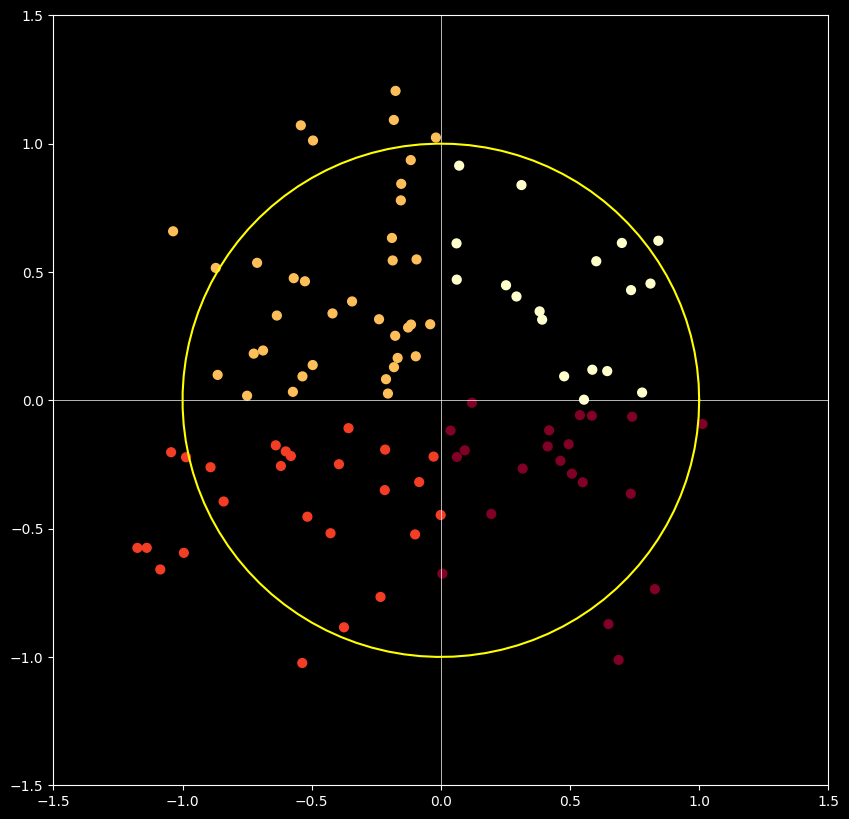

In [28]:
t = torch.linspace(0, 2*π, 100)
circle = torch.stack((torch.cos(t), torch.sin(t)), dim=1)

ax = plt.gca()

plot_dots_w_lables(ax, d, l)  # Plot the dots with labels on the same axes
plot_circle(ax, circle)

save_local(plt, 'initial_data.png')
plt.show()



## Making a simple Linear model (no activation function)

In [16]:
import torch 
from torch import nn 
from torch import optim

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 2)


    def forward(self, x):
        x = self.l1(x)
        return x

In [17]:
linear_model = LinearModel()
with torch.no_grad():
    predictions = linear_model(d)
    transformed_circle = linear_model(circle)

transformed_dots = predictions.detach().numpy()
transformed_circle = transformed_circle.detach().numpy()

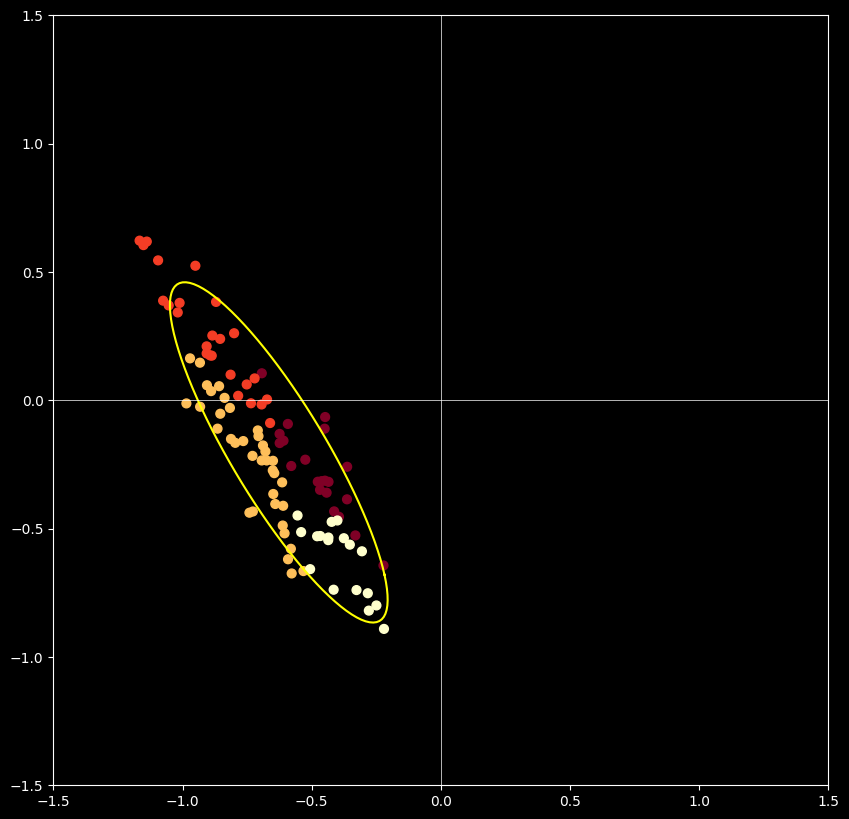

In [27]:
ax = plt.gca()
ax.plot(transformed_circle[:, 0], transformed_circle[:, 1], c='yellow')  # 'r-' sets the color of the line to red
plot_dots_w_lables(plt.gca() ,transformed_dots, l)
save_local(plt, 'linear_model_output.png')


### running the same linear transformation 5 times

In [ ]:
temp_d = d 
temp_circle = circle

for i in range(5):
    with torch.no_grad():
        predictions = linear_model(temp_d)
        transformed_circle = linear_model(temp_circle)

    transformed_dots = predictions.detach().numpy()
    transformed_circle = transformed_circle.detach().numpy()

    fig, ax = plt.subplots()
    ax.plot(transformed_circle[:, 0], transformed_circle[:, 1], c='yellow')  # 'r-' sets the color of the line to red
    plot_dots_w_lables(plt.gca() ,transformed_dots, l)
    save_local(plt, f'linear_model_output_{i}.png')

    temp_d = torch.tensor(transformed_dots)
    temp_circle = torch.tensor(transformed_circle)



# Activation Functions

In [46]:
import torch.nn.functional as F

# 5 most known activation functions
activation_functions = {
    'ReLU': F.relu,
    'Sigmoid': torch.sigmoid,
    'Tanh': torch.tanh,
    'Softmax': lambda x: F.softmax(x, dim=1),
    'LeakyReLU': F.leaky_relu,
    'Mish': F.mish
}



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


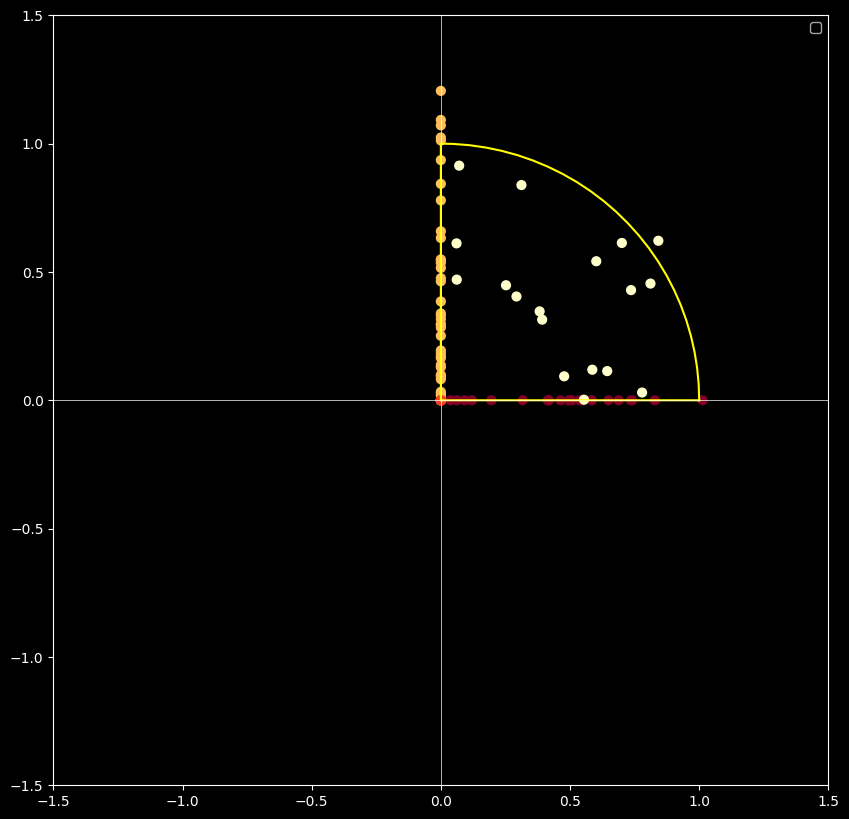

In [38]:

# Applying ReLU activation function on d and circle
relu_transformed_d = F.relu(d)
relu_transformed_circle = F.relu(circle)

# Converting tensors to numpy for plotting
relu_transformed_d = relu_transformed_d.detach().numpy()
relu_transformed_circle = relu_transformed_circle.detach().numpy()

# Plotting the transformed data
fig, ax = plt.subplots()

plot_circle(ax, relu_transformed_circle)
plot_dots_w_lables(ax, relu_transformed_d, l)
ax.legend()
save_local(plt, 'relu_transformed_output.png')

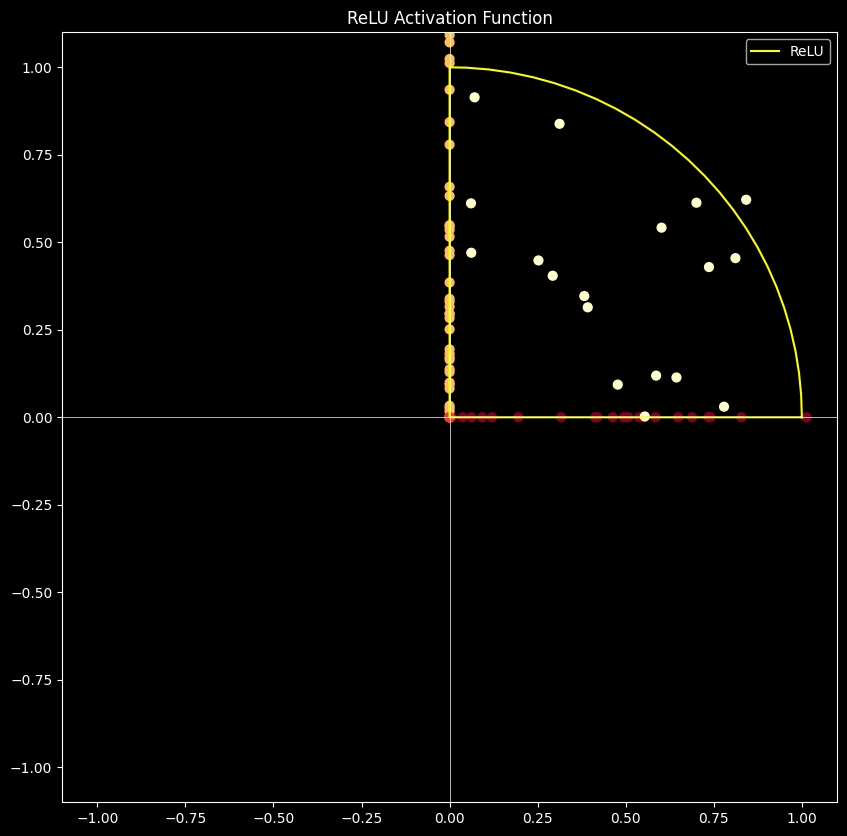

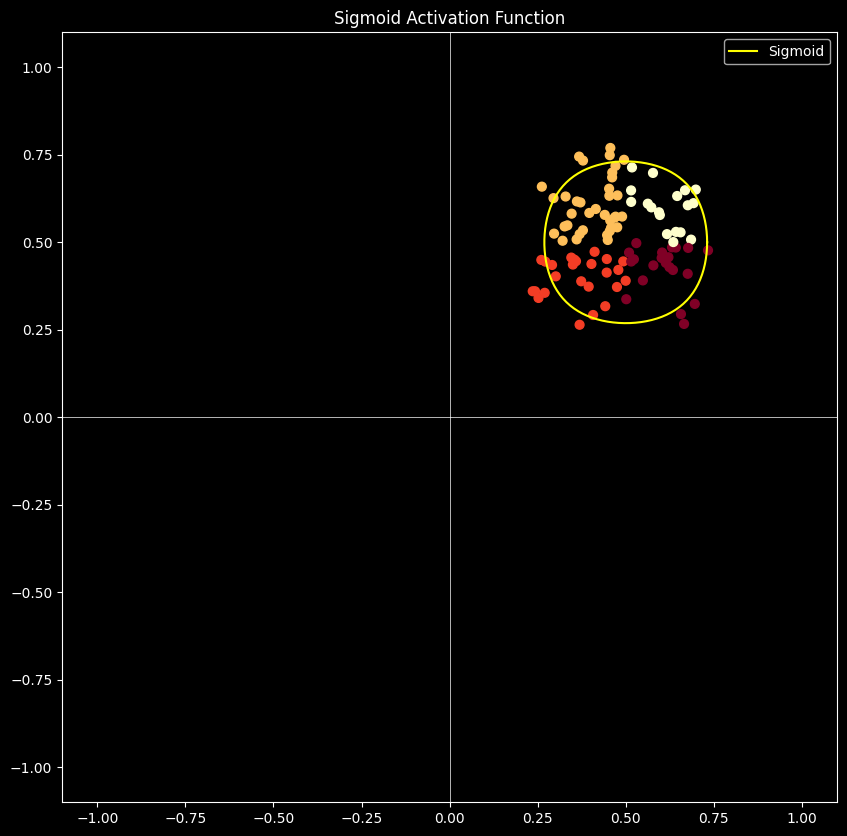

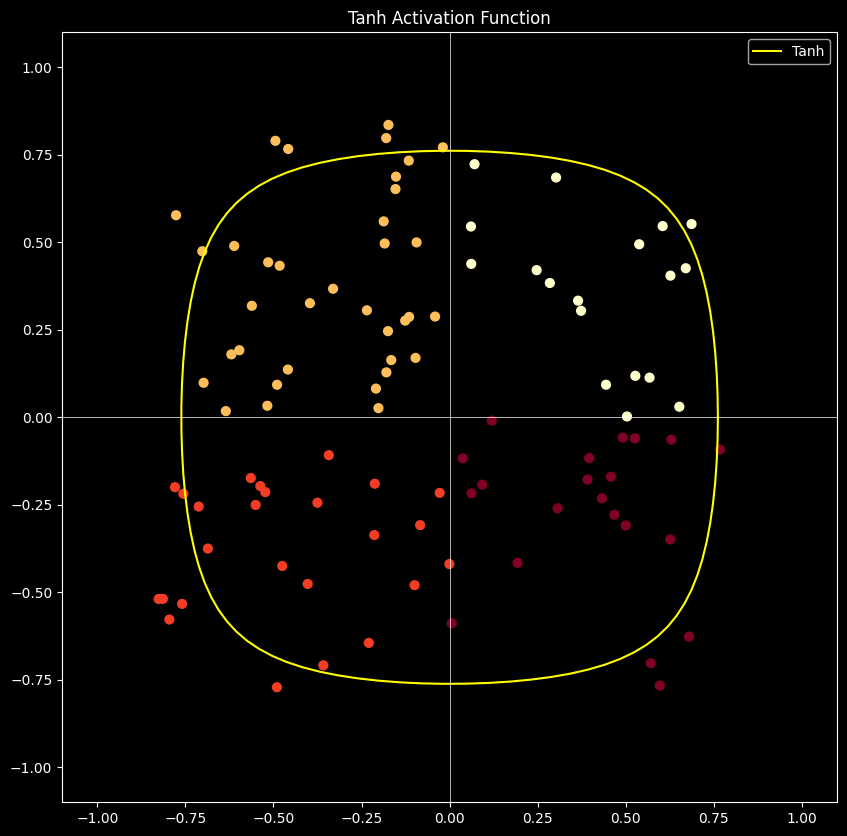

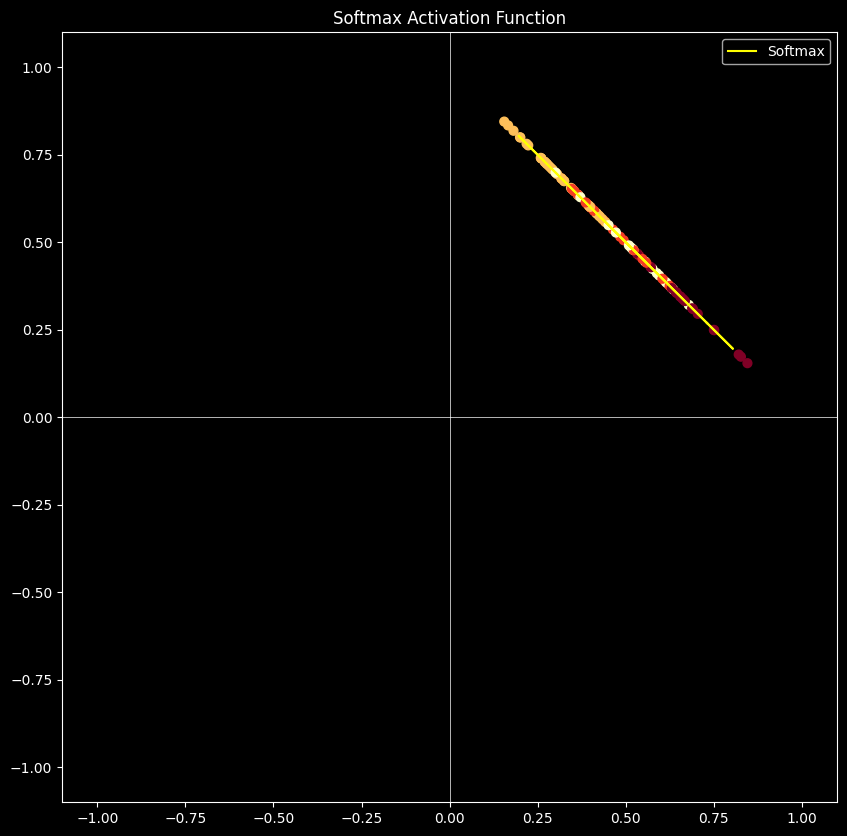

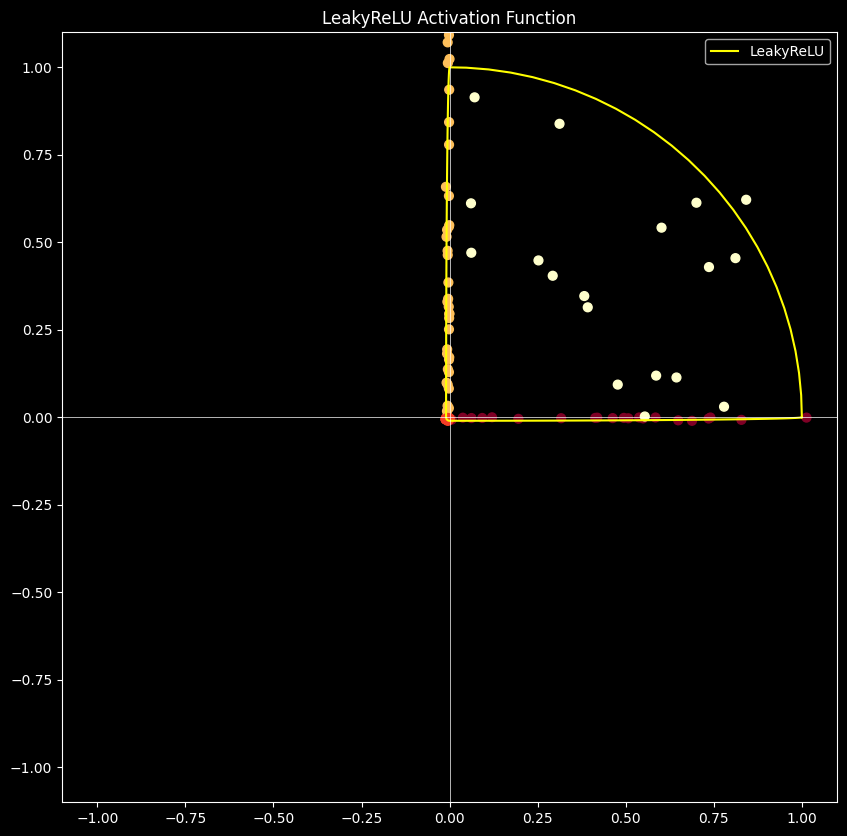

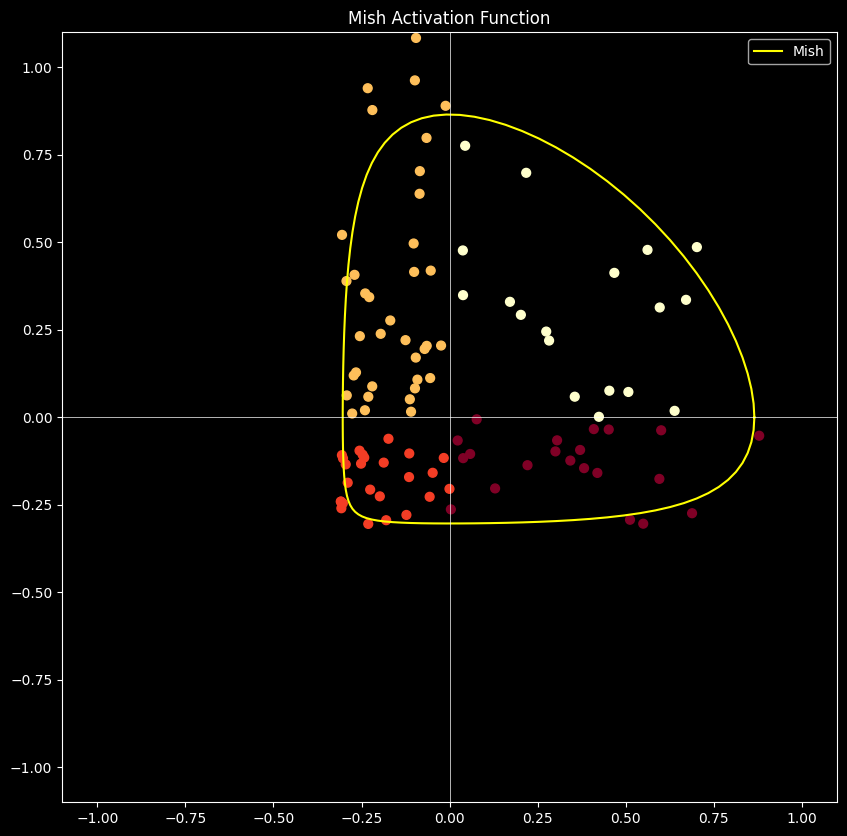

In [47]:
for name, func in activation_functions.items():
    # Applying the activation function on d and circle
    transformed_d = func(d)
    transformed_circle = func(circle)

    # Converting tensors to numpy for plotting
    transformed_d_numpy = transformed_d.detach().numpy()
    transformed_circle_numpy = transformed_circle.detach().numpy()

    # Plotting the transformed data
    fig, ax = plt.subplots()
    plot_circle(ax, transformed_circle_numpy)
    plot_dots_w_lables(ax, transformed_d_numpy, l, plot_box_size=1.1)
    ax.set_title(f'{name} Activation Function')
    ax.legend([name])
    save_local(plt, f'transformed_output_{name.lower()}.png')


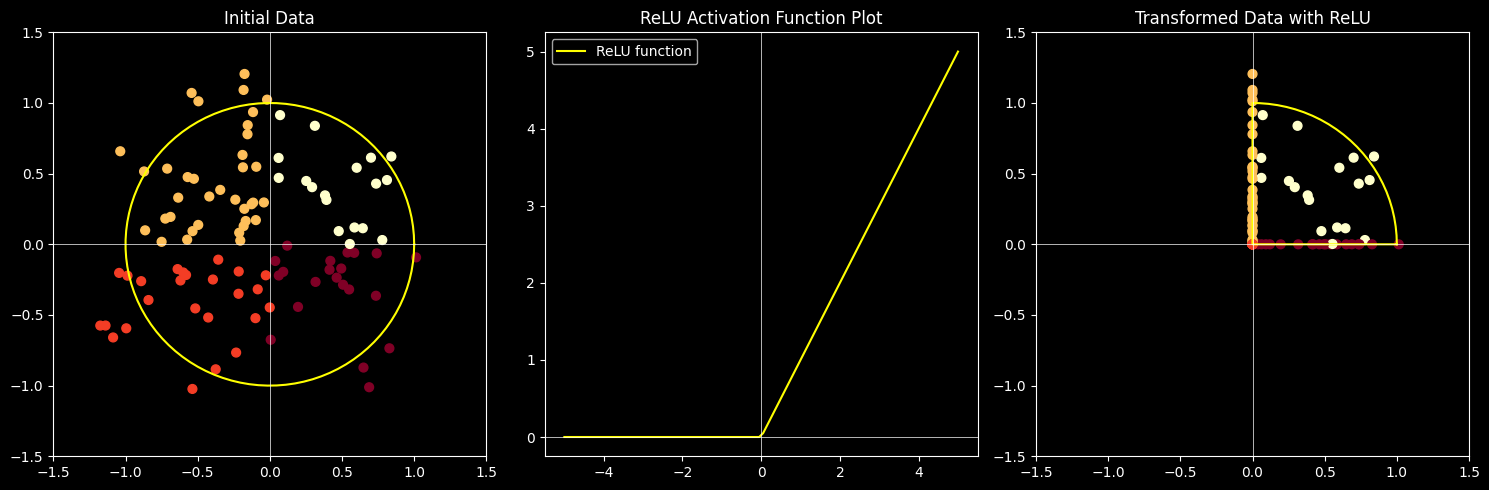

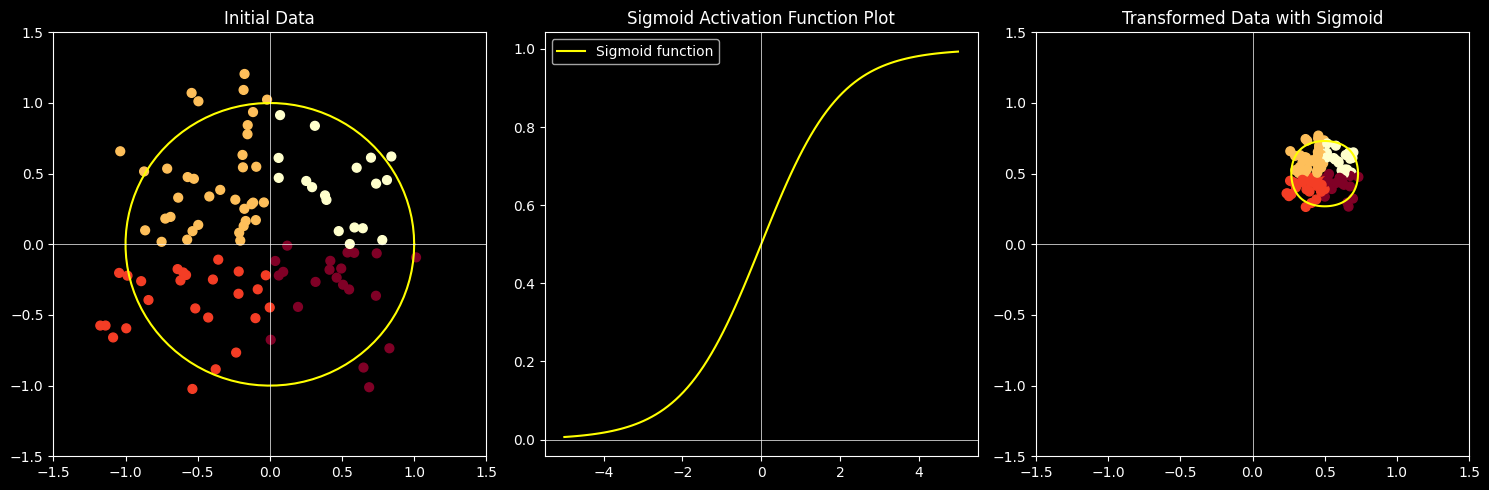

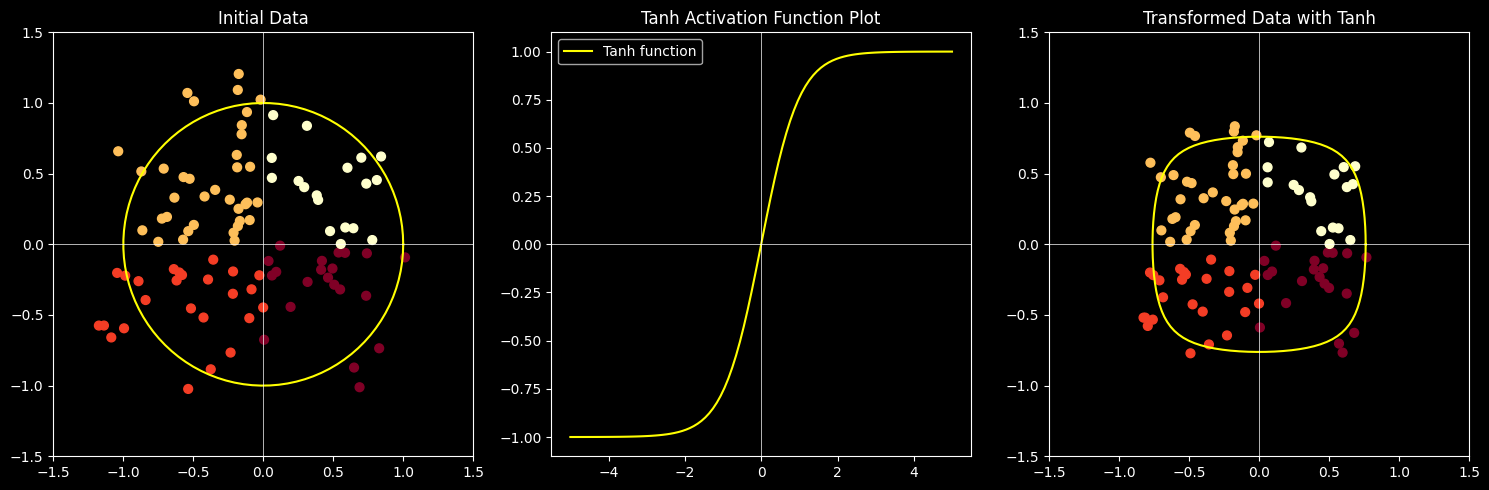

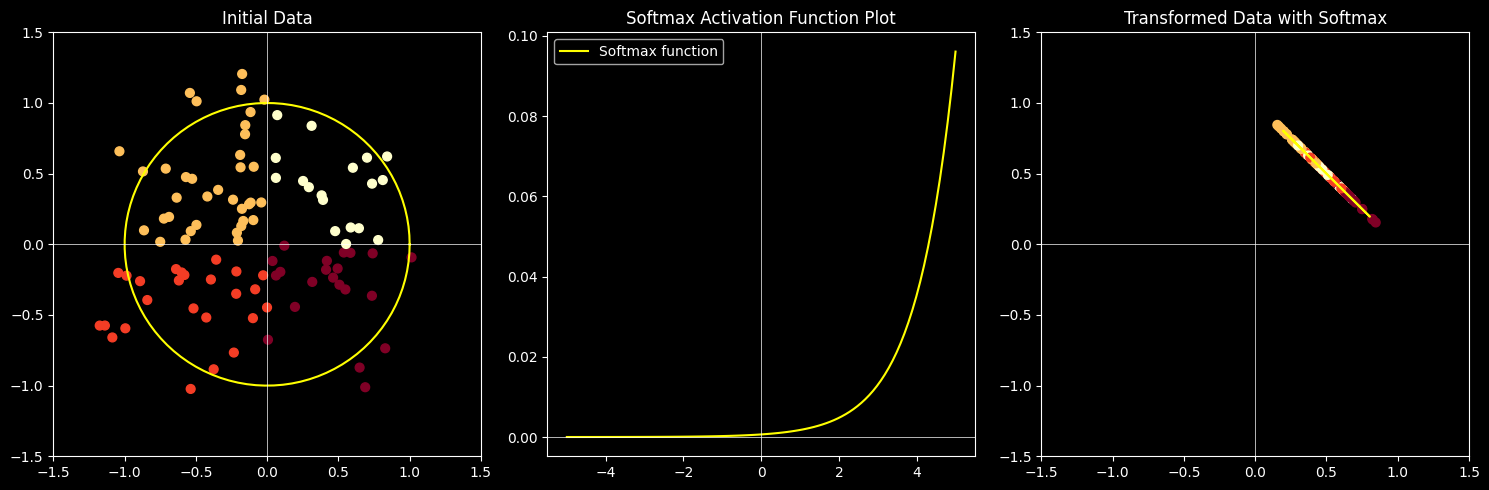

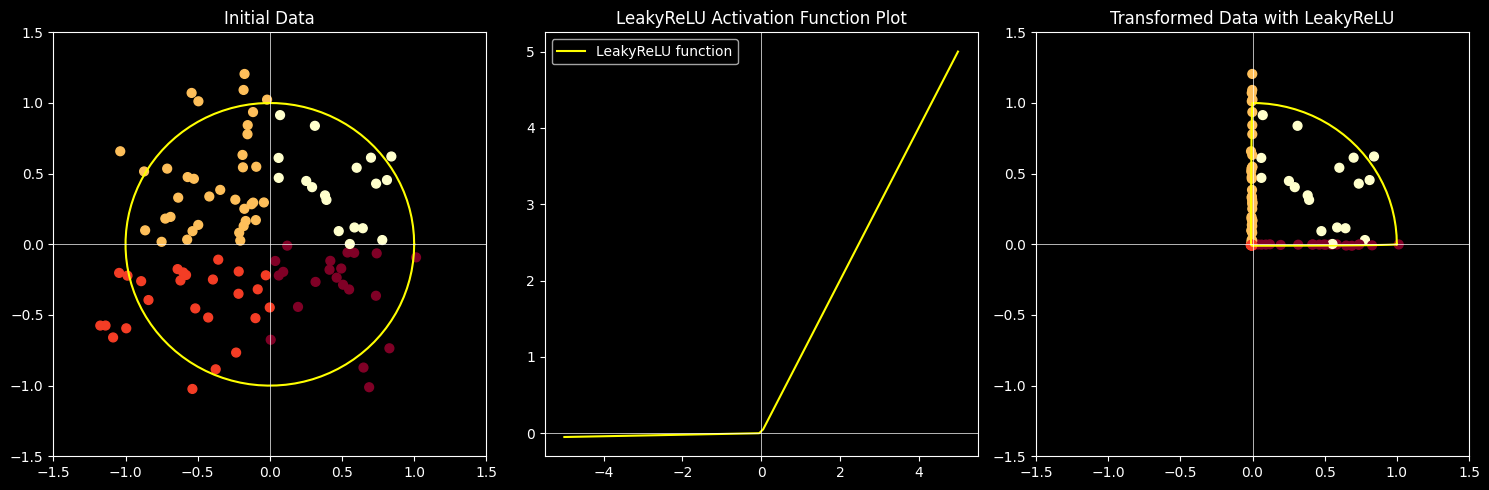

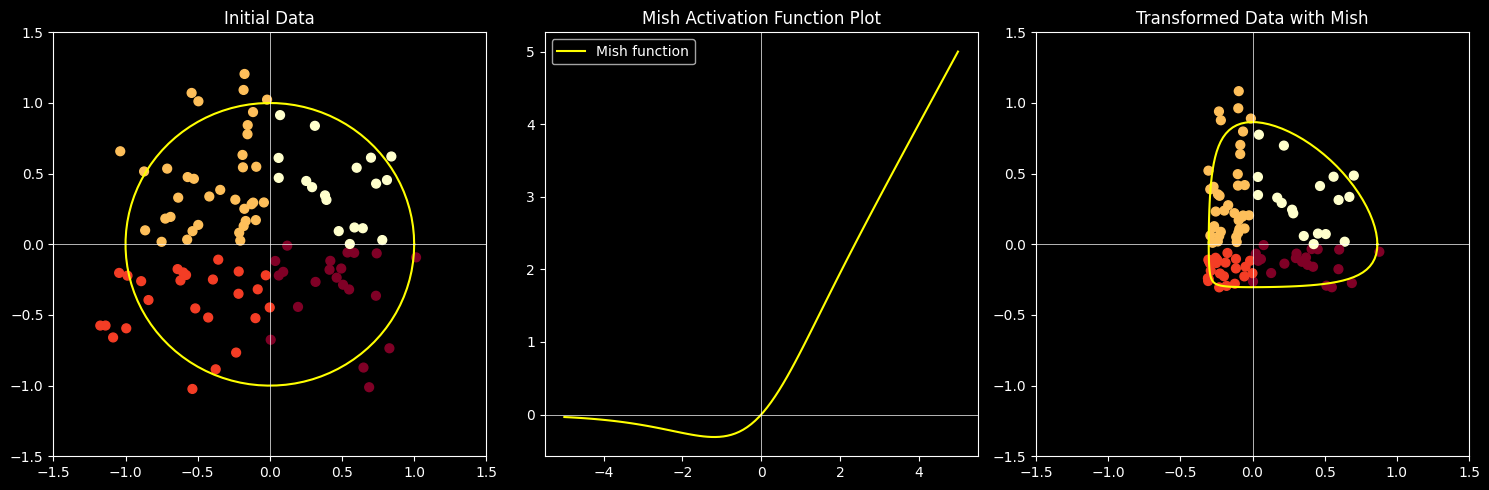

In [55]:
import numpy as np

# Define a function to plot the activation function itself
def plot_activation_function(ax, func, name, range_x):
    x = np.linspace(range_x[0], range_x[1], 100)
    # Check if the function is softmax to adjust the dimension
    if name == 'Softmax':
        # Softmax expects a batch dimension, so add an extra dimension and then remove it after applying softmax
        y = func(torch.tensor(x, dtype=torch.float32).unsqueeze(0)).squeeze().detach().numpy()
    else:
        y = func(torch.tensor(x, dtype=torch.float32)).detach().numpy()
    ax.plot(x, y, label=f'{name} function', color='yellow')
    ax.set_title(f'{name} Activation Function Plot')
    ax.legend()
    ax.axhline(0, linewidth=0.5)  # Add a horizontal line at y=0
    ax.axvline(0, linewidth=0.5)  # Add a vertical line at x=0

# Define the range for plotting activation functions
range_x = (-5, 5)

for name, func in activation_functions.items():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot initial data
    plot_circle(axs[0], circle.detach().numpy())
    plot_dots_w_lables(axs[0], d.detach().numpy(), l)
    axs[0].set_title('Initial Data')
    
    # Plot the activation function itself
    plot_activation_function(axs[1], func, name, range_x)
    
    # Applying the activation function on d and circle
    transformed_d = func(d)
    transformed_circle = func(circle)
    
    # Converting tensors to numpy for plotting
    transformed_d_numpy = transformed_d.detach().numpy()
    transformed_circle_numpy = transformed_circle.detach().numpy()
    
    # Plotting the transformed data
    plot_circle(axs[2], transformed_circle_numpy)
    plot_dots_w_lables(axs[2], transformed_d_numpy, l)
    axs[2].set_title(f'Transformed Data with {name}')
    
    # Display the plots
    plt.tight_layout()
    # save_local(plt, f'activation_function_comparison_{name.lower()}.png')
